In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(columns = ['RowNumber','CustomerId','Surname','Geography','Gender'])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
print("Shape of X_train --->", X_train.shape)
print("Shape of X_test --->", X_test.shape)
print("Shape of y_train --->", y_train.shape)
print("Shape of y_test --->", y_test.shape)

Shape of X_train ---> (8000, 8)
Shape of X_test ---> (2000, 8)
Shape of y_train ---> (8000,)
Shape of y_test ---> (2000,)


In [8]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape((y_train.shape[0],1)).T
y_test = y_test.reshape((y_test.shape[0],1)).T

In [9]:
print("Shape of X_train --->", X_train.shape)
print("Shape of X_test --->", X_test.shape)
print("Shape of y_train --->", y_train.shape)
print("Shape of y_test --->", y_test.shape)

Shape of X_train ---> (8, 8000)
Shape of X_test ---> (8, 2000)
Shape of y_train ---> (1, 8000)
Shape of y_test ---> (1, 2000)


In [10]:
from GD_coursera import Batch_Gradient_descent

obj = Batch_Gradient_descent()

In [11]:
obj = obj.model(X_train = X_train, Y_train = y_train, X_test = X_test, Y_test = y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.608409
Cost after iteration 200: 0.556158
Cost after iteration 300: 0.522889
Cost after iteration 400: 0.500941
Cost after iteration 500: 0.485973
Cost after iteration 600: 0.475461
Cost after iteration 700: 0.467889
Cost after iteration 800: 0.462313
Cost after iteration 900: 0.458130
Cost after iteration 1000: 0.454939
Cost after iteration 1100: 0.452471
Cost after iteration 1200: 0.450539
Cost after iteration 1300: 0.449010
Cost after iteration 1400: 0.447789
Cost after iteration 1500: 0.446806
Cost after iteration 1600: 0.446009
Cost after iteration 1700: 0.445360
Cost after iteration 1800: 0.444827
Cost after iteration 1900: 0.444387
train accuracy: 80.4125 %
test accuracy: 80.6 %


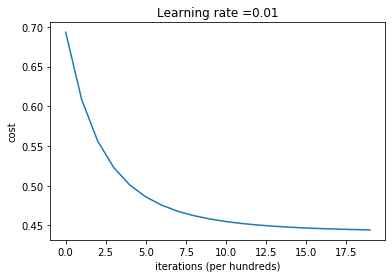

In [12]:
# Plot learning curve (with costs)
costs = np.squeeze(obj['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(obj["learning_rate"]))
plt.show()